In [112]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#For SVM
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import imblearn

In [5]:
df = pd.read_csv("../DataSet/cleaned_Telco-Customer-Churn_data.csv")

In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Label
0,7590-VHVEG,0,0,1,0,-1.277445,0,1,0,0,...,0,0,0,0,1,2,-1.160323,-0.994242,0,Not Churn
1,5575-GNVDE,1,0,0,0,0.066327,1,0,0,2,...,0,0,0,1,0,3,-0.259629,-0.173244,0,Not Churn
2,3668-QPYBK,1,0,0,0,-1.236724,1,0,0,2,...,0,0,0,0,1,3,-0.362660,-0.959674,1,Churn
3,7795-CFOCW,1,0,0,0,0.514251,0,1,0,2,...,2,0,0,1,0,0,-0.746535,-0.194766,0,Not Churn
4,9237-HQITU,0,0,0,0,-1.236724,1,0,1,0,...,0,0,0,0,1,2,0.197365,-0.940470,1,Churn


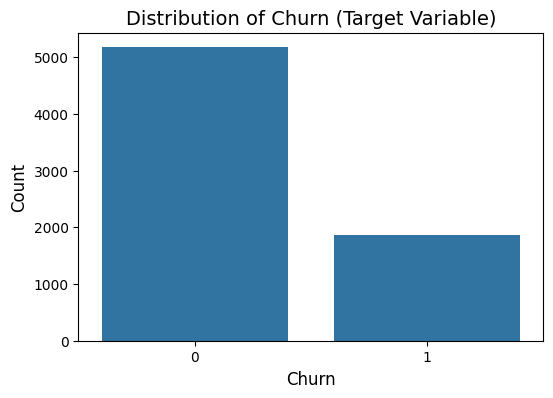

Churn Distribution (%)
 Churn
0    73.46
1    26.54
Name: proportion, dtype: float64


In [22]:
# to find the balance between churn and unchurn classes
# churn_labels = {0: 'Not Churn', 1: 'Churn'}
# df['Churn_Label'] = df['Churn'].map(churn_labels)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')

plt.title("Distribution of Churn (Target Variable)", fontsize=14)
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Percentage distribution
churn_perc = df['Churn'].value_counts(normalize=True) * 100
print("Churn Distribution (%)\n", churn_perc.round(2))

In [96]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [54]:
# df.drop(columns=['customerID', 'Churn_Label'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470,1


## From this, it is evident that DataSet is 'imbalanced'. Coz as per standard if feature is less than threshold of 30%, it considered as imbalanced DataSet. 

## SMOTE

### Why we are using
#### We use SMOTE over simple random oversampling to address class imbalance because SMOTE generates new, synthetic data points for the minority class instead of just duplicating existing ones.

In [106]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=======Shapes of training and testing data==========")
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", y_train.shape)
print("Y_test: ", y_test.shape)

=======Shapes of training and testing data==========
X_train:  (5634, 19)
X_test:  (1409, 19)
Y_train:  (5634,)
Y_test:  (1409,)


In [142]:
smote = SMOTE(random_state=42)
# print(smote)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# print(X_train_resampled.shape)
# print(y_train_resampled.shape)

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [78]:
print("New distribution after SMOTE:", y_train_resampled.value_counts())

New distribution after SMOTE: Churn
0    4138
1    4138
Name: count, dtype: int64


In [88]:
svm_model = SVC(kernel='rbf', random_state=42) #rbf - Radial Basis Function

In [90]:
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

In [128]:
y_pred = svm_model.predict(X_test)

In [114]:
cm = confusion_matrix(y_test, y_pred)
labels = ['No Churn', 'Churn'] # 0: No Churn, 1: Churn

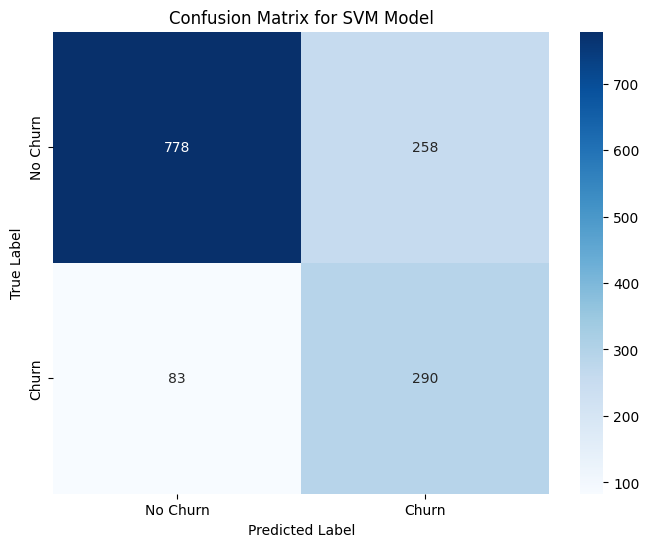

In [116]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [122]:
print(classification_report(y_test, y_pred)) # 0: No Churn, 1: Churn

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.78      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409

